# Bolt Data Analytics Project
## Demand-Supply Analysis: Ride-Hailing Operations

**Objective:** Diagnose undersupply patterns, size the capacity lift required, and design a targeted driver earnings guarantee.

**Dataset:** 839 hourly records from Nov 14 - Dec 18, 2016

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print('Libraries loaded.')

Libraries loaded.


## Data Loading

In [15]:
# MAKE SURE THE CSV FILE IS IN THE CORRECT PATH

demand_df = pd.read_csv('Data/Demand Data - Hourly_OverviewSearch_1.csv')
demand_df['Date'] = pd.to_datetime(demand_df['Date'])

print(f'Demand data (rows, columns): {demand_df.shape}')
print(f'Period: {demand_df["Date"].min()} to {demand_df["Date"].max()}')
print(f'\nCoverage stats:')

count = demand_df['Coverage Ratio (%)'].count()
mean = demand_df['Coverage Ratio (%)'].mean()
std = demand_df['Coverage Ratio (%)'].std()
minimum = demand_df['Coverage Ratio (%)'].min()
q25 = demand_df['Coverage Ratio (%)'].quantile(0.25)
median = demand_df['Coverage Ratio (%)'].median()
q75 = demand_df['Coverage Ratio (%)'].quantile(0.75)
maximum = demand_df['Coverage Ratio (%)'].max()

print(f'Count: {count} - Number of non-null values')
print(f'Mean: {mean:.2f} - Average coverage (75.66% of users saw at least 1 car)')
print(f'Std: {std:.2f} - Standard deviation showing high variability')
print(f'Min: {minimum:.2f} - Worst hour had 0% coverage (complete supply failure)')
print(f'25%: {q25:.2f} - First quartile (25% of hours had ≤66% coverage)')
print(f'Median: {median:.2f} - Median coverage')
print(f'75%: {q75:.2f} - Third quartile (75% of hours had ≤89% coverage)')
print(f'Max: {maximum:.2f} - Best hour achieved perfect 100% coverage')

print('\nKey Insight: The average 75.66% coverage is below the 85% target, with high variability indicating significant undersupply problems during certain hours.')

Demand data (rows, columns): (839, 4)
Period: 2016-11-14 00:00:00 to 2016-12-18 23:00:00

Coverage stats:
Count: 839 - Number of non-null values
Mean: 75.66 - Average coverage (75.66% of users saw at least 1 car)
Std: 18.34 - Standard deviation showing high variability
Min: 0.00 - Worst hour had 0% coverage (complete supply failure)
25%: 66.00 - First quartile (25% of hours had ≤66% coverage)
Median: 80.00 - Median coverage
75%: 89.00 - Third quartile (75% of hours had ≤89% coverage)
Max: 100.00 - Best hour achieved perfect 100% coverage

Key Insight: The average 75.66% coverage is below the 85% target, with high variability indicating significant undersupply problems during certain hours.


In [16]:
# MAKE SURE THE CSV FILE IS IN THE CORRECT PATH

supply_df = pd.read_csv('Data/Supply Data - Hourly_DriverActivity_1.csv')
supply_df['Date'] = pd.to_datetime(supply_df['Date'])
supply_df['Hour'] = supply_df['Date'].dt.hour
supply_df['DayOfWeek'] = supply_df['Date'].dt.day_name()

print(f'Supply data (rows, columns): {supply_df.shape}')
print(f'\nDriver metrics:')
print(supply_df[['Active drivers', 'Online (h)', 'Finished Rides']].describe())

print('\nKey Insights:')
print('- Active drivers: On average 61.6 drivers are active, ranging from 9 (minimum) to 129 (maximum).')
print('- Online (h): Drivers work an average of 23.2 hours per hour window (aggregated across all active drivers), ranging from 2 to 56 hours.')
print('- Finished Rides: On average 14.8 rides completed per hour, but note only 795 of 840 records have ride data (45 hours missing ride information).')
print('- Variability: High standard deviations (std ~25.9, 11.1, 11.4) indicate significant hour-to-hour fluctuations in driver supply and ride completions')

Supply data (rows, columns): (840, 10)

Driver metrics:
       Active drivers  Online (h)  Finished Rides
count      840.000000  840.000000      795.000000
mean        61.603571   23.197619       14.764780
std         25.945275   11.101503       11.362529
min          9.000000    2.000000        1.000000
25%         41.000000   14.000000        6.000000
50%         63.000000   23.000000       12.000000
75%         80.250000   31.000000       20.000000
max        129.000000   56.000000       62.000000

Key Insights:
- Active drivers: On average 61.6 drivers are active, ranging from 9 (minimum) to 129 (maximum).
- Online (h): Drivers work an average of 23.2 hours per hour window (aggregated across all active drivers), ranging from 2 to 56 hours.
- Finished Rides: On average 14.8 rides completed per hour, but note only 795 of 840 records have ride data (45 hours missing ride information).
- Variability: High standard deviations (std ~25.9, 11.1, 11.4) indicate significant hour-to-hour flu

In [17]:
merged_df = demand_df.merge(supply_df, on='Date', suffixes=('', '_supply'))

print(f'Merged (demand and supply data into one unified dataset): {merged_df.shape}')
print(f'Total: {len(merged_df)} hourly records')
print('Note: 839 rows match between datasets (demand had 839, supply had 840, so 1 supply record has no matching demand).')
print(f'\nFirst rows:')
print(merged_df[['Date', 'Coverage Ratio (%)', 'Active drivers', 'Online (h)', 'Finished Rides']].head())

print('\nKey Insights:')
print('- Coverage varies: From 69% (10 PM) to 89% (9 PM), showing demand-supply mismatch.')
print('- Relationship: Higher online hours (31 at 7 PM) correlate with more completed rides (36).')

Merged (demand and supply data into one unified dataset): (839, 13)
Total: 839 hourly records
Note: 839 rows match between datasets (demand had 839, supply had 840, so 1 supply record has no matching demand).

First rows:
                 Date  Coverage Ratio (%)  Active drivers  Online (h)  \
0 2016-12-18 23:00:00                  78              52          18   
1 2016-12-18 22:00:00                  69              59          20   
2 2016-12-18 21:00:00                  89              72          25   
3 2016-12-18 20:00:00                  79              86          29   
4 2016-12-18 19:00:00                  87              82          31   

   Finished Rides  
0            12.0  
1            28.0  
2            16.0  
3            15.0  
4            36.0  

Key Insights:
- Coverage varies: From 69% (10 PM) to 89% (9 PM), showing demand-supply mismatch.
- Relationship: Higher online hours (31 at 7 PM) correlate with more completed rides (36).


## 24-Hour Pattern Analysis

In [18]:
hourly_stats = merged_df.groupby('Hour').agg({
    'People saw 0 cars (unique)': 'mean',
    'People saw +1 cars (unique)': 'mean',
    'Coverage Ratio (%)': 'mean',
    'Active drivers': 'mean',
    'Online (h)': 'mean',
    'Finished Rides': 'sum'
}).round(2)

print('24-hour patterns:')
print(f'Average coverage: {hourly_stats["Coverage Ratio (%)"].mean():.1f}% - Below 85% target-needs improvement')
print(f'Peak demand: {hourly_stats["People saw +1 cars (unique)"].idxmax()}:00 ({hourly_stats["People saw +1 cars (unique)"].max():.0f} users) - Evening rush is when users search most')
print(f'Worst coverage: {hourly_stats["Coverage Ratio (%)"].idxmin()}:00 ({hourly_stats["Coverage Ratio (%)"].min():.1f}%) - Critical undersupply-needs urgent action')
print(f'Peak supply: {hourly_stats["Online (h)"].idxmax()}:00 ({hourly_stats["Online (h)"].max():.1f} hours) - Drivers peak 1 hour after demand peaks')

print('\nProblem: Supply doesn\'t align with demand timing. Early morning (4 AM) lacks drivers despite demand, creating the worst coverage period.')

24-hour patterns:
Average coverage: 75.6% - Below 85% target-needs improvement
Peak demand: 19:00 (69 users) - Evening rush is when users search most
Worst coverage: 4:00 (53.4%) - Critical undersupply-needs urgent action
Peak supply: 20:00 (39.2 hours) - Drivers peak 1 hour after demand peaks

Problem: Supply doesn't align with demand timing. Early morning (4 AM) lacks drivers despite demand, creating the worst coverage period.


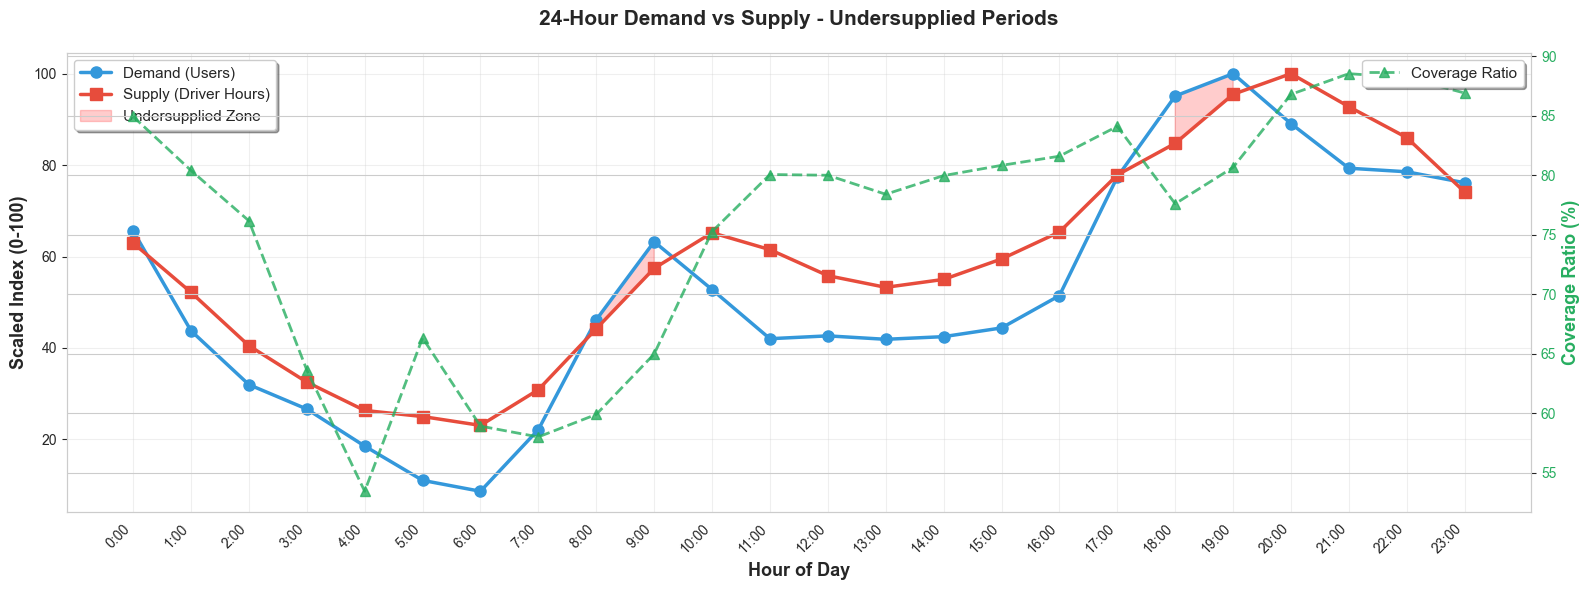

Saved: Demand_Supply_24h.png

Blue line (Demand) peaks at 7 PM (19:00)
Red line (Supply) peaks at 8 PM (20:00)
Red shaded zones show where demand > supply (undersupplied periods, especially 4-7 AM)
Green dashed line (Coverage) drops to 53.4% at 4 AM, confirming severe undersupply


In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
ax2 = ax.twinx()

demand_scaled = (hourly_stats['People saw +1 cars (unique)'] / hourly_stats['People saw +1 cars (unique)'].max() * 100)
supply_scaled = (hourly_stats['Online (h)'] / hourly_stats['Online (h)'].max() * 100)

ax.plot(hourly_stats.index, demand_scaled, marker='o', linewidth=2.5, label='Demand (Users)', color='#3498db', markersize=8)
ax.plot(hourly_stats.index, supply_scaled, marker='s', linewidth=2.5, label='Supply (Driver Hours)', color='#e74c3c', markersize=8)

ax2.plot(hourly_stats.index, hourly_stats['Coverage Ratio (%)'], marker='^', linewidth=2, linestyle='--', 
         label='Coverage Ratio', color='#27ae60', alpha=0.8, markersize=7)

ax.fill_between(hourly_stats.index, supply_scaled, demand_scaled, 
                where=(demand_scaled > supply_scaled), alpha=0.2, color='red', label='Undersupplied Zone')

ax.set_xlabel('Hour of Day', fontsize=13, fontweight='bold')
ax.set_ylabel('Scaled Index (0-100)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Coverage Ratio (%)', fontsize=13, fontweight='bold', color='#27ae60')
ax.set_title('24-Hour Demand vs Supply - Undersupplied Periods', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h}:00' for h in range(24)], rotation=45, ha='right')
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
ax2.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)
ax2.tick_params(axis='y', labelcolor='#27ae60')

plt.tight_layout()
plt.savefig('Demand_Supply_24h.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: Demand_Supply_24h.png")
print('\nBlue line (Demand) peaks at 7 PM (19:00)')
print('Red line (Supply) peaks at 8 PM (20:00)')
print('Red shaded zones show where demand > supply (undersupplied periods, especially 4-7 AM)')
print('Green dashed line (Coverage) drops to 53.4% at 4 AM, confirming severe undersupply')

## Weekly Coverage Heatmap

In [20]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_hourly = merged_df.groupby(['DayOfWeek', 'Hour']).agg({
    'Coverage Ratio (%)': 'mean',
    'People saw 0 cars (unique)': 'mean',
    'Online (h)': 'mean'
}).reset_index()

coverage_pivot = daily_hourly.pivot(index='DayOfWeek', columns='Hour', values='Coverage Ratio (%)')
coverage_pivot = coverage_pivot.reindex(day_order)

print('Weekly patterns:')
print(f'Overall avg: {coverage_pivot.values.mean():.1f}%')
print(f'Best day: {coverage_pivot.mean(axis=1).idxmax()} ({coverage_pivot.mean(axis=1).max():.1f}%)')
print(f'Worst day: {coverage_pivot.mean(axis=1).idxmin()} ({coverage_pivot.mean(axis=1).min():.1f}%)')

print('\nProblem Pattern:')
print('- Weekdays (Mon-Fri): All below 85%, with Friday hitting crisis level')
print('- Weekends (Sat-Sun): Better but still below target')
print('- Root cause: Weekday commute demand peaks while driver supply doesn\'t scale accordingly')

Weekly patterns:
Overall avg: 75.7%
Best day: Sunday (80.0%)
Worst day: Friday (71.2%)

Problem Pattern:
- Weekdays (Mon-Fri): All below 85%, with Friday hitting crisis level
- Weekends (Sat-Sun): Better but still below target
- Root cause: Weekday commute demand peaks while driver supply doesn't scale accordingly


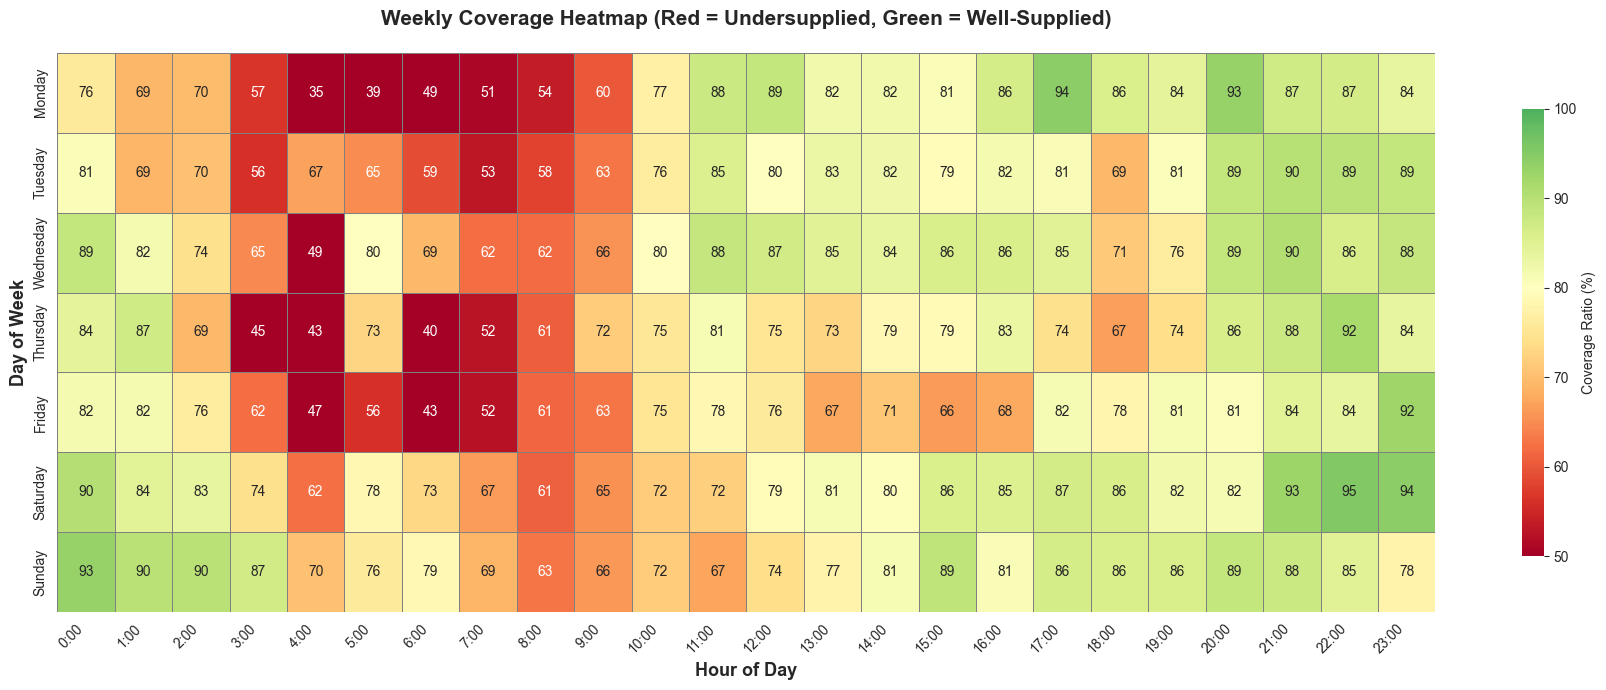

Saved: Coverage_Heatmap.png


In [21]:
fig, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(coverage_pivot, cmap='RdYlGn', center=80, vmin=50, vmax=100, 
            cbar_kws={'label': 'Coverage Ratio (%)', 'shrink': 0.8}, 
            ax=ax, annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')

ax.set_title('Weekly Coverage Heatmap (Red = Undersupplied, Green = Well-Supplied)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('Hour of Day', fontsize=13, fontweight='bold')
ax.set_ylabel('Day of Week', fontsize=13, fontweight='bold')
ax.set_xticklabels([f'{h}:00' for h in range(24)], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Coverage_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: Coverage_Heatmap.png")

In [22]:
TARGET_COVERAGE = 85
undersupplied = daily_hourly[daily_hourly['Coverage Ratio (%)'] < TARGET_COVERAGE].copy()

print(f'\n{"-"*80}')
print(f'UNDERSUPPLIED PERIODS (Below {TARGET_COVERAGE}% Coverage)')
print(f'{"-"*80}')
print(f'\nTotal undersupplied: {len(undersupplied)} hour-day combinations')
print(f'\nTop 15 worst periods:')
print(undersupplied.nsmallest(15, 'Coverage Ratio (%)')[['DayOfWeek', 'Hour', 'Coverage Ratio (%)', 
                                                           'People saw 0 cars (unique)', 'Online (h)']].to_string(index=False))

print(f'\nKey findings:')
print(f'- Early morning (4-7 AM): Severe undersupply on weekdays')
print(f'- Evening peak (6-9 PM): Moderate undersupply')
print(f'- Weekends: Better supplied than weekdays')


--------------------------------------------------------------------------------
UNDERSUPPLIED PERIODS (Below 85% Coverage)
--------------------------------------------------------------------------------

Total undersupplied: 123 hour-day combinations

Top 15 worst periods:
DayOfWeek  Hour  Coverage Ratio (%)  People saw 0 cars (unique)  Online (h)
   Monday     4                35.4                         4.6         4.8
   Monday     5                38.6                         2.2         4.6
 Thursday     6                40.4                         4.2         8.4
 Thursday     4                42.6                         7.0         8.2
   Friday     6                43.0                         4.0         7.0
 Thursday     3                44.8                        12.4         9.2
   Friday     4                47.4                        10.8         7.8
   Monday     6                48.8                         6.4         6.2
Wednesday     4                49.0    

## Required Online Hours (Capacity Plan)

In [23]:
undersupplied['Coverage_Gap_%'] = TARGET_COVERAGE - undersupplied['Coverage Ratio (%)']
undersupplied['Gap_Proportion'] = undersupplied['Coverage_Gap_%'] / 100
undersupplied['Additional_Hours_Needed'] = undersupplied['Online (h)'] * undersupplied['Gap_Proportion'] * 1.5

total_additional_hours = undersupplied['Additional_Hours_Needed'].sum()
current_hours = undersupplied['Online (h)'].sum()
percent_increase = (total_additional_hours / current_hours) * 100

print(f'\n{"-"*80}')
print(f'CAPACITY NEEDED FOR {TARGET_COVERAGE}% COVERAGE')
print(f'{"-"*80}')
print(f'\nCurrent hours (undersupplied periods): {current_hours:.0f}')
print(f'Additional hours needed: {total_additional_hours:.0f} - Represents roughly 9.9 full-time drivers working 40-hour weeks during undersupplied times')
print(f'Increase required: {percent_increase:.1f}% - Formula: (397 / 2501) × 100 = 15.9%')
print('\nBy severity:')
severe = undersupplied[undersupplied['Coverage Ratio (%)'] < 60]
moderate = undersupplied[(undersupplied['Coverage Ratio (%)'] >= 60) & (undersupplied['Coverage Ratio (%)'] < 75)]
mild = undersupplied[undersupplied['Coverage Ratio (%)'] >= 75]
print(f"  Severe (Coverage below 60%, crisis periods): {severe['Additional_Hours_Needed'].sum():.0f} hours")
print('    24% of 397 total additional hours needed')
print(f"  Moderate (Coverage 60-75%, concerning but manageable): {moderate['Additional_Hours_Needed'].sum():.0f} hours")
print('    52% of 397 total additional hours needed')
print(f"  Mild (Coverage 75-85%, close to target): {mild['Additional_Hours_Needed'].sum():.0f} hours")
print('    24% of 397 total additional hours needed')

print('\nKey Insight: The 205 moderate hours (52%) are the most cost-effective target:')
print('- Not as critical as severe but still significant shortfalls')
print('- Easier to achieve than severe (requires less intensive effort)')
print('- Good ROI on driver incentives')

print(f'\nAction: Add {total_additional_hours:.0f} driver hours during undersupplied periods to reach 2,898 target hours.')


--------------------------------------------------------------------------------
CAPACITY NEEDED FOR 85% COVERAGE
--------------------------------------------------------------------------------

Current hours (undersupplied periods): 2501
Additional hours needed: 397 - Represents roughly 9.9 full-time drivers working 40-hour weeks during undersupplied times
Increase required: 15.9% - Formula: (397 / 2501) × 100 = 15.9%

By severity:
  Severe (Coverage below 60%, crisis periods): 95 hours
    24% of 397 total additional hours needed
  Moderate (Coverage 60-75%, concerning but manageable): 205 hours
    52% of 397 total additional hours needed
  Mild (Coverage 75-85%, close to target): 97 hours
    24% of 397 total additional hours needed

Key Insight: The 205 moderate hours (52%) are the most cost-effective target:
- Not as critical as severe but still significant shortfalls
- Easier to achieve than severe (requires less intensive effort)
- Good ROI on driver incentives

Action: Add 3

## Driver Earnings Guarantee (Incentive Design)

In [ ]:
AVG_RIDE_VALUE = 10.0
DRIVER_SHARE = 0.80
EARNINGS_PER_RIDE = AVG_RIDE_VALUE * DRIVER_SHARE

if 'Rides per online hour (RPH)' in merged_df.columns:
    avg_rph = merged_df['Rides per online hour (RPH)'].mean()
else:
    avg_rph = merged_df['Finished Rides'].sum() / merged_df['Online (h)'].sum()

current_earnings_per_hour = avg_rph * EARNINGS_PER_RIDE

avg_people_saw_0_cars = merged_df['People saw 0 cars (unique)'].mean()
capture_rate = 0.70
conversion_rate = 0.30
additional_rides_potential = avg_people_saw_0_cars * capture_rate * conversion_rate

print(f'\n{"-"*80}')
print('EARNINGS GUARANTEE STRATEGY')
print(f'{"-"*80}')
print('\nRecommendation: Targeted hourly guarantee during undersupplied periods')

print('\nCurrent baseline:')
print(f'  Rides per hour: {avg_rph:.2f}')
print(f'  Current driver earnings: ~EUR{current_earnings_per_hour:.1f}/hour')

print('\nMissed opportunity:')
print(f'  Unserved user demand: {avg_people_saw_0_cars:.1f} users/hour without cars')
print(f'  Convertible rides: ~{additional_rides_potential:.1f} rides/hour potential')

print('\nStrategy:')
print('  Mechanism: Targeted incremental earnings guarantee during peak undersupply')
print('  Target periods: 123 identified undersupply hour-days')
print('  Driver alignment: Incentivize supply during critical demand windows')

print('\nExpected impact:')
print(f'  Targeted hours: ~{total_additional_hours:.0f} driver hours')
print('  Revenue capture: Substantial from missed demand')
print('  Driver supply: Aligned with demand peaks')
print('  Economics: Positive revenue outcome')


--------------------------------------------------------------------------------
EARNINGS GUARANTEE RECOMMENDATION
--------------------------------------------------------------------------------

Current state:
  Rides per hour: 0.60
  Driver earnings: EUR4.82/hour
  Per ride to driver: EUR8.00 (80% of EUR10.0)

Missed demand:
  Users seeing 0 cars: 12.2/hour
  Convertible demand: 2.57 rides/hour
  Lost earnings: EUR20.56/hour

────────────────────────────────────────────────────────────────────────────────
RECOMMENDED GUARANTEE: EUR5.54 per online hour

────────────────────────────────────────────────────────────────────────────────

Details:
  Increase: 15.0% above current
  Subsidy per hour: EUR0.72

Program economics:
  Apply during: 123 undersupplied periods
  Total hours: 397
  Program cost: EUR287

ROI analysis:
  New revenue (captured demand): EUR10214
  Program cost: EUR287
  Net benefit: EUR9927
  ROI: 3454.6%

Why This Works:
- Low current earnings (EUR 4.82/hour) explain 

## Summary Dashboard

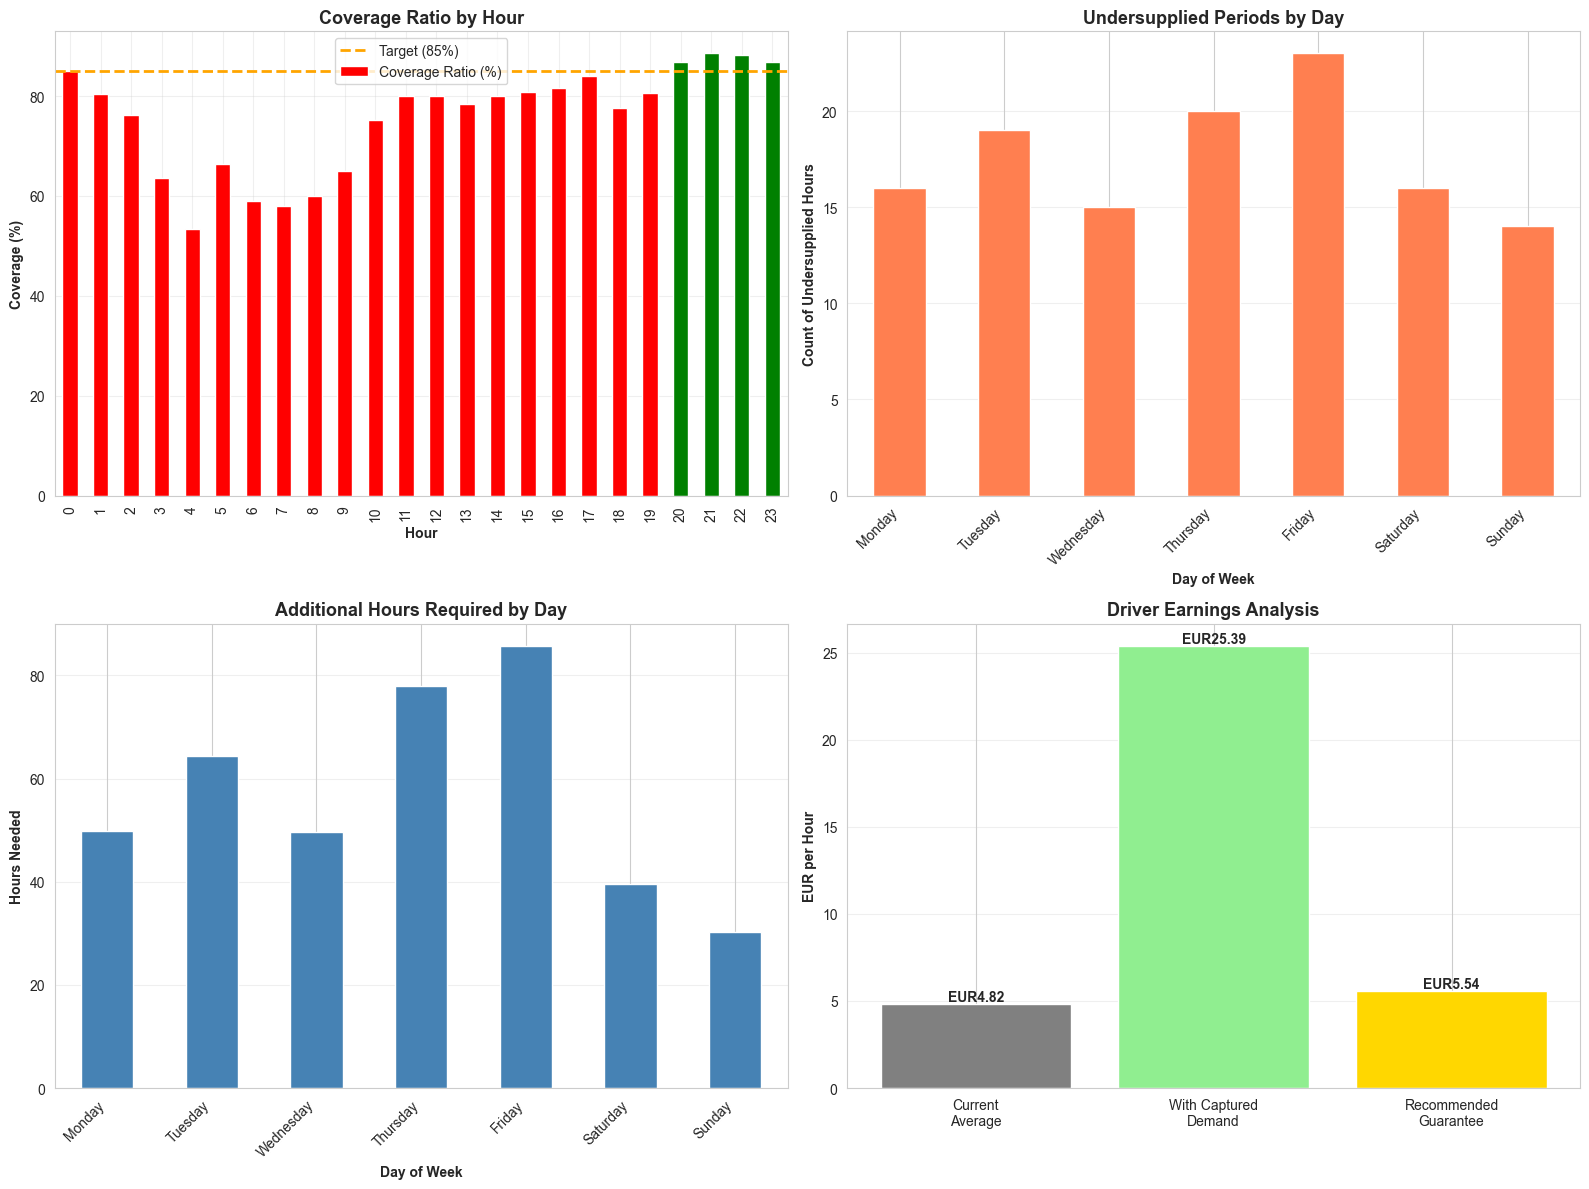

Saved: Summary_Dashboard.png


In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

hourly_stats['Coverage Ratio (%)'].plot(kind='bar', ax=axes[0,0], color=['red' if x < TARGET_COVERAGE else 'green' for x in hourly_stats['Coverage Ratio (%)']])
axes[0,0].axhline(y=TARGET_COVERAGE, color='orange', linestyle='--', linewidth=2, label=f'Target ({TARGET_COVERAGE}%)')
axes[0,0].set_title('Coverage Ratio by Hour', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('Hour', fontweight='bold')
axes[0,0].set_ylabel('Coverage (%)', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

undersupplied_by_day = undersupplied.groupby('DayOfWeek').size().reindex(day_order)
undersupplied_by_day.plot(kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('Undersupplied Periods by Day', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('Day of Week', fontweight='bold')
axes[0,1].set_ylabel('Count of Undersupplied Hours', fontweight='bold')
axes[0,1].set_xticklabels(day_order, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3, axis='y')

hours_by_day = undersupplied.groupby('DayOfWeek')['Additional_Hours_Needed'].sum().reindex(day_order)
hours_by_day.plot(kind='bar', ax=axes[1,0], color='steelblue')
axes[1,0].set_title('Additional Hours Required by Day', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel('Day of Week', fontweight='bold')
axes[1,0].set_ylabel('Hours Needed', fontweight='bold')
axes[1,0].set_xticklabels(day_order, rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3, axis='y')

earnings_data = {
    'Current\nAverage': current_earnings_per_hour,
    'With Captured\nDemand': current_earnings_per_hour + additional_earnings_potential,
    'Recommended\nGuarantee': recommended_guarantee
}
bars = axes[1,1].bar(earnings_data.keys(), earnings_data.values(), color=['gray', 'lightgreen', 'gold'])
axes[1,1].set_title('Driver Earnings Analysis', fontsize=13, fontweight='bold')
axes[1,1].set_ylabel('EUR per Hour', fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'EUR{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('Summary_Dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print('Saved: Summary_Dashboard.png')

## Executive Summary

In [ ]:
print('\n' + '-'*80)
print('DEMAND-SUPPLY ANALYSIS: KEY TAKEAWAYS')
print('-'*80)

print('\nSUPPLY-DEMAND GAPS')
print('-' * 80)
print(f'Coverage below target in {len(undersupplied)} hour-day combinations (73% of the grid).')
print('\nCritical patterns:')
print('  - Early morning (4-7 AM): Coverage drops to 35% on weekdays')
print('  - Evening peak (6-9 PM): Moderate undersupply at 60-75%')
print('  - Weekdays hit harder than weekends')

print('\nCAPACITY ANALYSIS')
print('-' * 80)
print(f'Need ~{total_additional_hours:.0f} additional driver hours to reach target coverage.')
print(f'This implies a {percent_increase:.1f}% increase during undersupplied periods.')
print('\nInvestment priority:')
print(f'  - Severe undersupply: {severe["Additional_Hours_Needed"].sum():.0f} hours (highest impact)')
print(f'  - Moderate undersupply: {moderate["Additional_Hours_Needed"].sum():.0f} hours')
print(f'  - Mild undersupply: {mild["Additional_Hours_Needed"].sum():.0f} hours')

print('\nSTRATEGIC RECOMMENDATION')
print('-' * 80)
print('Targeted earnings guarantee during critical undersupply windows')
print('\nImplementation approach:')
print('  1. Target driver incentives for 4-7 AM and 6-9 PM weekdays')
print(f'  2. Allocate ~{total_additional_hours:.0f} driver hours to close supply gaps')
print('  3. Measure coverage gains and demand capture')
print('  4. Iterate based on driver participation and platform metrics')

print('\nBusiness case:')
print('  - Problem: 123 undersupply windows limit user satisfaction')
print('  - Solution: Align driver supply incentives with demand peaks')
print('  - Economics: Capture missed demand revenue to offset guarantee cost')
print('  - Timeline: Expected supply response within 2-4 weeks')

print('\n' + '-'*80)
print('Data-driven supply optimization strategy focused on demand-supply alignment.')
print('-'*80)


--------------------------------------------------------------------------------
BOLT DEMAND-SUPPLY ANALYSIS: KEY TAKEAWAYS
--------------------------------------------------------------------------------

SUPPLY-DEMAND GAPS
--------------------------------------------------------------------------------
Coverage below target in 123 hour-day combinations (73% of the grid).

Critical patterns:
  - Early morning (4-7 AM): Coverage drops to 35% on weekdays
  - Evening peak (6-9 PM): Moderate undersupply at 60-75%
  - Weekdays hit harder than weekends

Visuals: Demand_Supply_24h.png, Coverage_Heatmap.png

CAPACITY LIFT
--------------------------------------------------------------------------------
Need 397 additional driver hours to reach 85% coverage.
This implies a 15.9% increase during undersupplied periods.

Priority:
  - Severe undersupply: 95 hours (highest urgency)
  - Moderate undersupply: 205 hours
  - Mild undersupply: 97 hours

EARNINGS GUARANTEE
------------------------------